<a href="https://colab.research.google.com/github/Jepees/Data-Mining-Dani/blob/main/CaseStudy-03/Study_Case_03_~_Group_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

plt.style.use('bmh'); sns.set()
"Done"

'Done'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CaseStudy-03/ASHRAE%20-%20Great%20Energy%20Predictor%20III.csv')

In [ ]:
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
for kolom in df.columns:
    print(f"jumlah unik kolom {kolom}: {len(df[kolom].unique())}")
    print(f"jumlah kosong kolom {kolom}: {sum(df[kolom].isnull())}")
    hilang = df[kolom].isnull().sum() / df.shape[0]
    print(f"persentase hilang: {hilang:.2%}\n")

jumlah unik kolom meter_reading: 1413
jumlah kosong kolom meter_reading: 0
persentase hilang: 0.00%

jumlah unik kolom primary_use: 16
jumlah kosong kolom primary_use: 0
persentase hilang: 0.00%

jumlah unik kolom square_feet: 1362
jumlah kosong kolom square_feet: 0
persentase hilang: 0.00%

jumlah unik kolom year_built: 116
jumlah kosong kolom year_built: 750
persentase hilang: 53.08%

jumlah unik kolom floor_count: 19
jumlah kosong kolom floor_count: 1061
persentase hilang: 75.09%

jumlah unik kolom air_temperature: 14
jumlah kosong kolom air_temperature: 0
persentase hilang: 0.00%

jumlah unik kolom cloud_coverage: 14
jumlah kosong kolom cloud_coverage: 17
persentase hilang: 1.20%

jumlah unik kolom dew_temperature: 14
jumlah kosong kolom dew_temperature: 0
persentase hilang: 0.00%

jumlah unik kolom precip_depth_1_hr: 12
jumlah kosong kolom precip_depth_1_hr: 176
persentase hilang: 12.46%

jumlah unik kolom sea_level_pressure: 14
jumlah kosong kolom sea_level_pressure: 89
persentas

In [ ]:
df['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [ ]:
df.describe(include='all')

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,NaN,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,NaN,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


In [ ]:
df = df[['meter_reading', 'primary_use', 'square_feet', 'year_built','floor_count']]

In [ ]:
df

,meter_reading,primary_use,square_feet,year_built,floor_count
0,237.749127,Education,7432,2008.0,NaN
1,118.553743,Education,2720,2004.0,NaN
2,23.626500,Education,5376,1991.0,NaN
3,382.736016,Education,23685,2002.0,NaN
4,1579.174237,Education,116607,1975.0,NaN
...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN
1409,4.732815,Education,4298,NaN,NaN
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN
1411,187.117994,Lodging/residential,29775,2001.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meter_reading  1413 non-null   float64
 1   primary_use    1413 non-null   object 
 2   square_feet    1413 non-null   int64  
 3   year_built     663 non-null    float64
 4   floor_count    352 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df['primary_use'] = df['primary_use'].astype('category')
df['square_feet'] = df['square_feet'].astype('float')
#df['year_built'] = df['year_built'].astype('int32')
#df['floor_count'] = df['floor_count'].astype('int32')

In [ ]:
df1 = df[['meter_reading', 'primary_use', 'square_feet']]
#kami hanya menggunakan 2 variabel tersebut ('primary_use' dan 'square_feet')karena 2 variabel lainnya mengandung terlalu banyak missing value

### Analisis keterkaitan antara masin-masing prediktor terhadap target

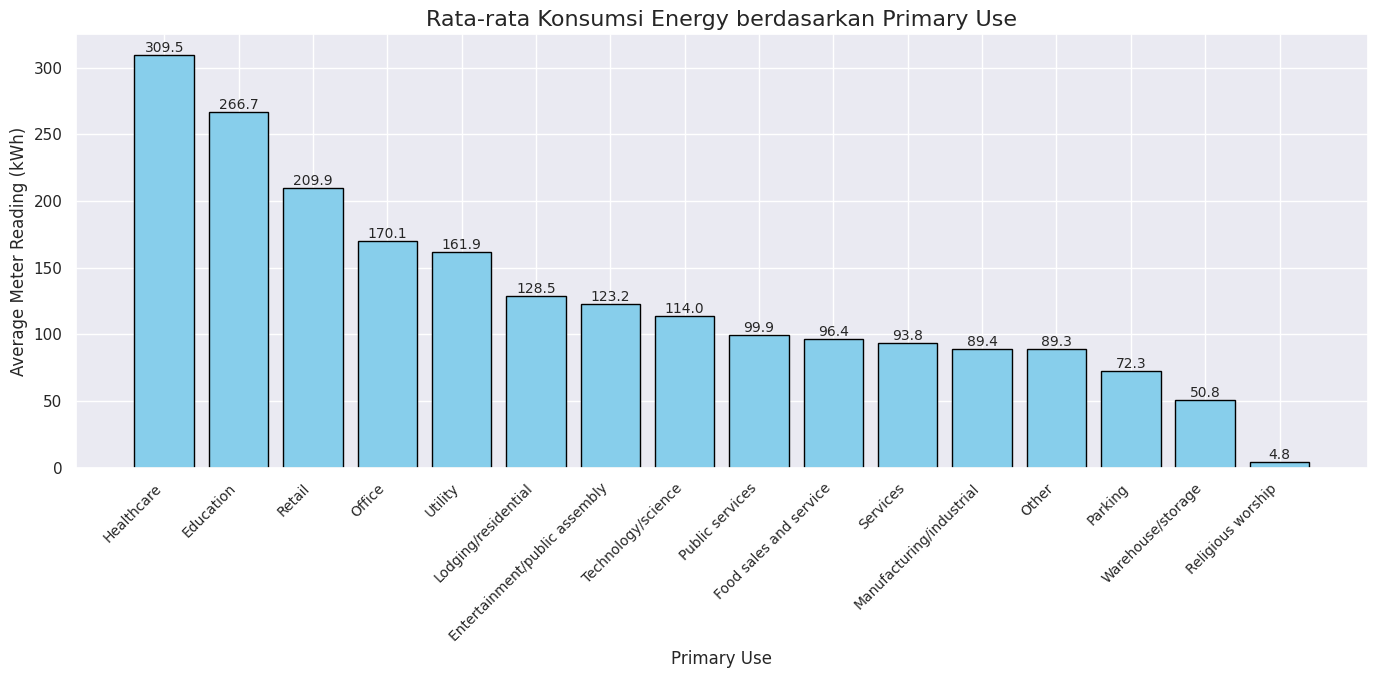

In [ ]:
# Menghitung rata-rata konsumsi energi per kategori 'primary_use', mengabaikan NaN
energy_by_use = df.groupby('primary_use')['meter_reading'].mean().sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(14, 7))
bars = plt.bar(energy_by_use.index, energy_by_use.values, color='skyblue', edgecolor='black')

# Menambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Rata-rata Konsumsi Energy berdasarkan Primary Use', fontsize=16)
plt.xlabel('Primary Use', fontsize=12)
plt.ylabel('Average Meter Reading (kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


***Insight***
1. **Healthcare dan Education** adalah dua kategori yang memiliki konsumsi energi tertinggi, dengan nilai lebih dari 250 kWh. Ini menunjukkan bahwa bangunan yang digunakan untuk kegiatan kesehatan dan pendidikan membutuhkan lebih banyak energi dibandingkan kategori lainnya.

2. **Retail, Office, dan Utility** juga mencatatkan konsumsi energi yang cukup tinggi, dengan rata-rata di atas 150 kWh. Bangunan dengan aktivitas komersial atau perkantoran cenderung memiliki konsumsi energi yang lebih besar karena adanya peralatan listrik yang intensif dan kebutuhan pencahayaan serta sistem HVAC (heating, ventilation, air conditioning) yang lebih tinggi.

3. **Religious Worship dan Parking** menunjukkan angka yang sangat rendah di bawah 10 kWh, yang menunjukkan bahwa kategori ini memerlukan energi dalam jumlah yang sangat sedikit dibandingkan kategori lainnya.

4. Sedangkan beberapa kategori yang lebih rendah, seperti **Services, Manufacturing/Industrial, dan Warehouse/Storage**, memiliki konsumsi energi yang lebih moderat, berkisar antara 50-100 kWh. Ini dapat mencerminkan efisiensi energi yang lebih baik atau ukuran bangunan yang lebih kecil.

***Rekomendasi***

1. Efisiensi Energi di Sektor Kesehatan dan Pendidikan:

  * Karena kategori Healthcare dan Education menunjukkan konsumsi energi yang sangat tinggi, institusi dalam kategori ini dapat melakukan pemeriksaan penggunaan energi untuk mengidentifikasi area yang dapat dioptimalkan.
  * Penggunaan teknologi hemat energi (seperti pencahayaan LED, HVAC yang efisien, atau sistem manajemen energi pintar) dapat membantu mengurangi konsumsi energi.

2. Perencanaan Energi untuk Bangunan Komersial dan Perkantoran:

  * Untuk Retail, Office, dan Utility, Sistem kontrol otomatis bisa diperkenalkan untuk pencahayaan dan HVAC, serta penggunaan perangkat listrik yang lebih efisien. Teknologi smart building juga bisa diterapkan untuk memonitor dan mengelola penggunaan energi secara real-time.

3. Mengelola Bangunan dengan Konsumsi Energi Rendah:

  * Untuk kategori dengan konsumsi energi rendah seperti Religious Worship dan Parking, bisa dipertimbangkan untuk memperkenalkan sistem energi terbarukan (seperti panel surya) untuk mendukung kebutuhan energi yang lebih rendah dan mengurangi biaya operasional jangka panjang.

4. Audit Energi dan Efisiensi di Bangunan Lain:

  * Kategori dengan konsumsi energi sedang, seperti Manufacturing/Industrial dan Warehouse/Storage, juga sebaiknya menjalani pemeriksaan pemakaian energi untuk melihat peluang efisiensi lebih lanjut. Meskipun konsumsi energi mereka tidak setinggi sektor lain, perbaikan yang berkelanjutan tetap dapat dilakukan.

Karena kategori pada variabel ini terlalu banyak. akan dilakukan penyederhanaan nanti sebelum membuat model

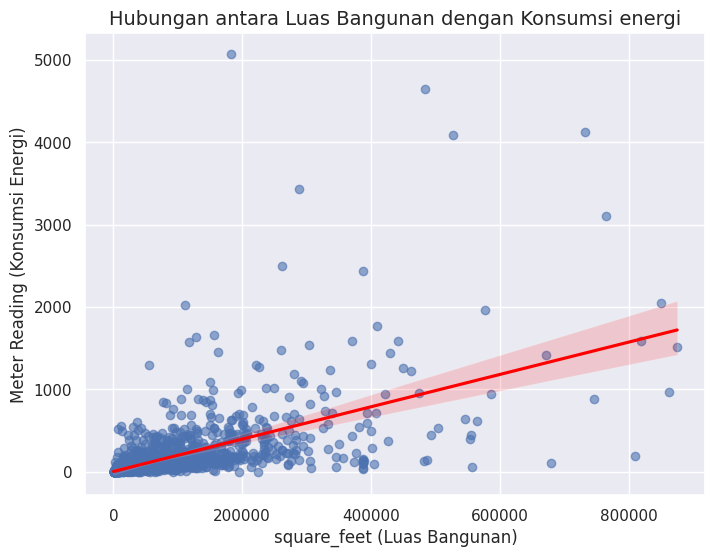

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='square_feet', y='meter_reading', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Hubungan antara Luas Bangunan dengan Konsumsi energi", fontsize=14)
plt.xlabel("square_feet (Luas Bangunan)", fontsize=12)
plt.ylabel("Meter Reading (Konsumsi Energi)", fontsize=12)
plt.show()

***Insight***

1. Hubungan antara square_feet dan meter_reading:

  * Ada hubungan positif antara ukuran gedung (square_feet) dan konsumsi energi (meter_reading). Ini berarti semakin besar ukuran gedung, semakin tinggi konsumsi energinya.
  * Garis regresi merah menunjukkan tren umum bahwa gedung dengan ukuran lebih besar cenderung memiliki konsumsi energi yang lebih tinggi.

2. Pola Distribusi:

  * Sebagian besar data berada di kisaran square_feet yang kecil (di bawah 200.000), dengan konsumsi energi yang bervariasi namun sebagian besar berada di bawah 1.000 unit.
  * Untuk gedung dengan ukuran lebih besar, variasi dalam konsumsi energi juga meningkat (terlihat dari titik-titik yang lebih tersebar di area tersebut).

***Rekomendasi***

1. Gedung dengan ukuran besar yang memiliki konsumsi energi di atas garis tren dapat menjadi target untuk mengevaluasi penggunaan/efisiensi energi. Hal ini dapat mengidentifikasi area untuk penghematan energi.

2. Meskipun gedung lebih kecil cenderung memiliki konsumsi energi lebih rendah, beberapa gedung di rentang ukuran kecil hingga sedang menunjukkan konsumsi energi yang tinggi. Hal ini bisa menjadi area perbaikan untuk efisiensi energi.

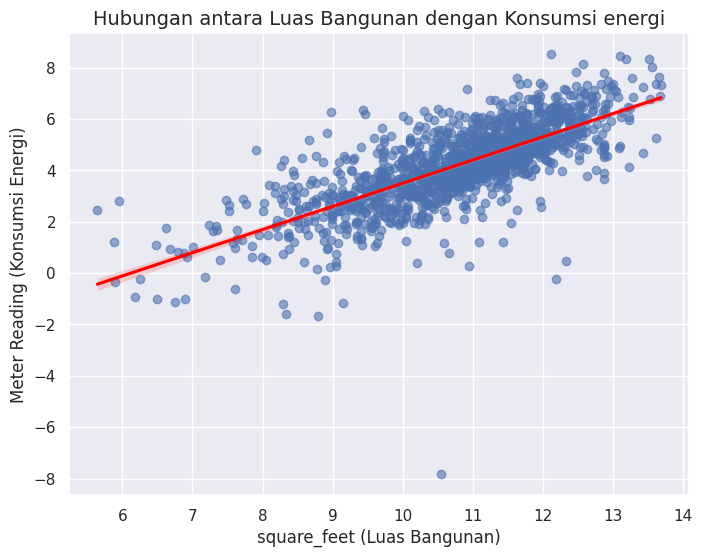

In [ ]:
a = df.copy()
a['ln_meter_reading'] = np.log(a['meter_reading'])
a['ln_square_feet'] = np.log(a['square_feet'])

plt.figure(figsize=(8, 6))
sns.regplot(data=a, x='ln_square_feet', y='ln_meter_reading', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Hubungan antara Luas Bangunan dengan Konsumsi energi", fontsize=14)
plt.xlabel("square_feet (Luas Bangunan)", fontsize=12)
plt.ylabel("Meter Reading (Konsumsi Energi)", fontsize=12)
plt.show()

Setelah dilakukan transformasi ln pada kedua variabel kontinu (meter reading (taget) dan squared feet (prediktor) )  hubungan linear antar keduannya menjadi kuat dan lebih baik.

Dari sini dapat dilakukan prediksi linear antara penggunaan energi dengan luas bangunan, dengan asumsi pengaruh dari kategori jenis penggunaan bangunan tersebut.​

saat pemodelan nanti, akan digunakan hubungan log-log pada dua variabel ini menggunakan regresi linear.

## Pembuatan model

### Analisis Kolom Target (meter_reading) (Kontinu)

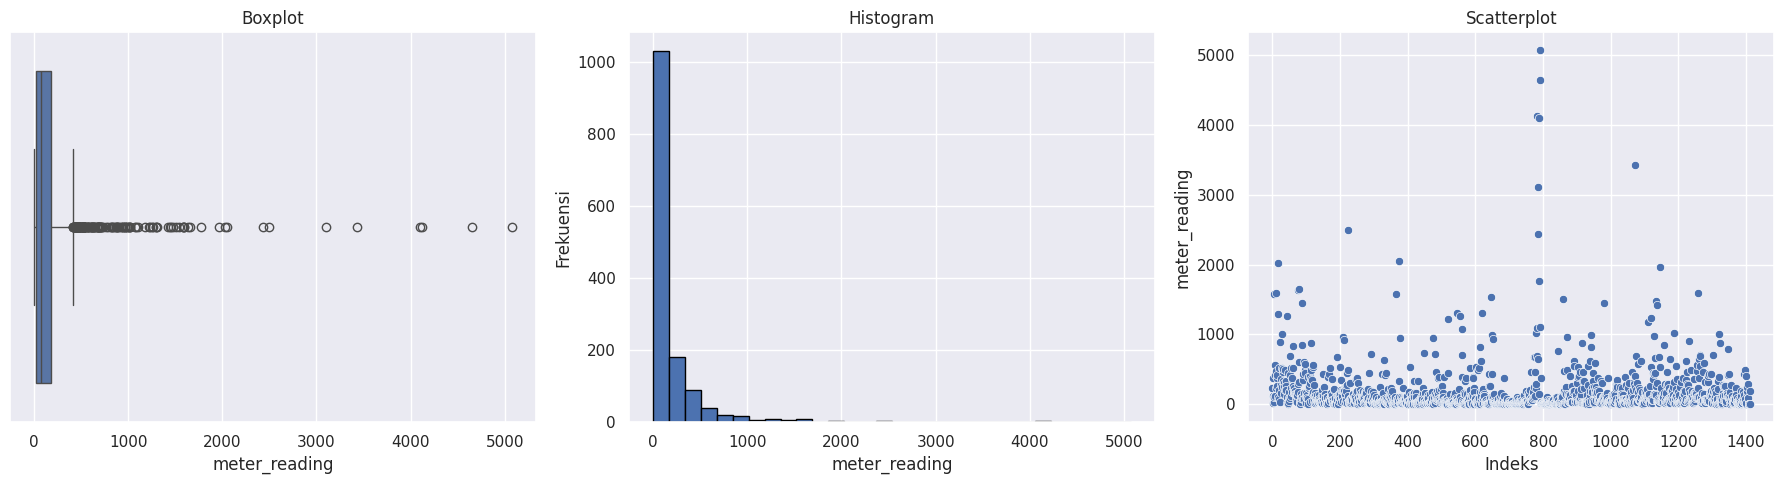

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='meter_reading', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['meter_reading'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('meter_reading')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['meter_reading'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('meter_reading')

# Menampilkan plot
plt.tight_layout()
plt.show()

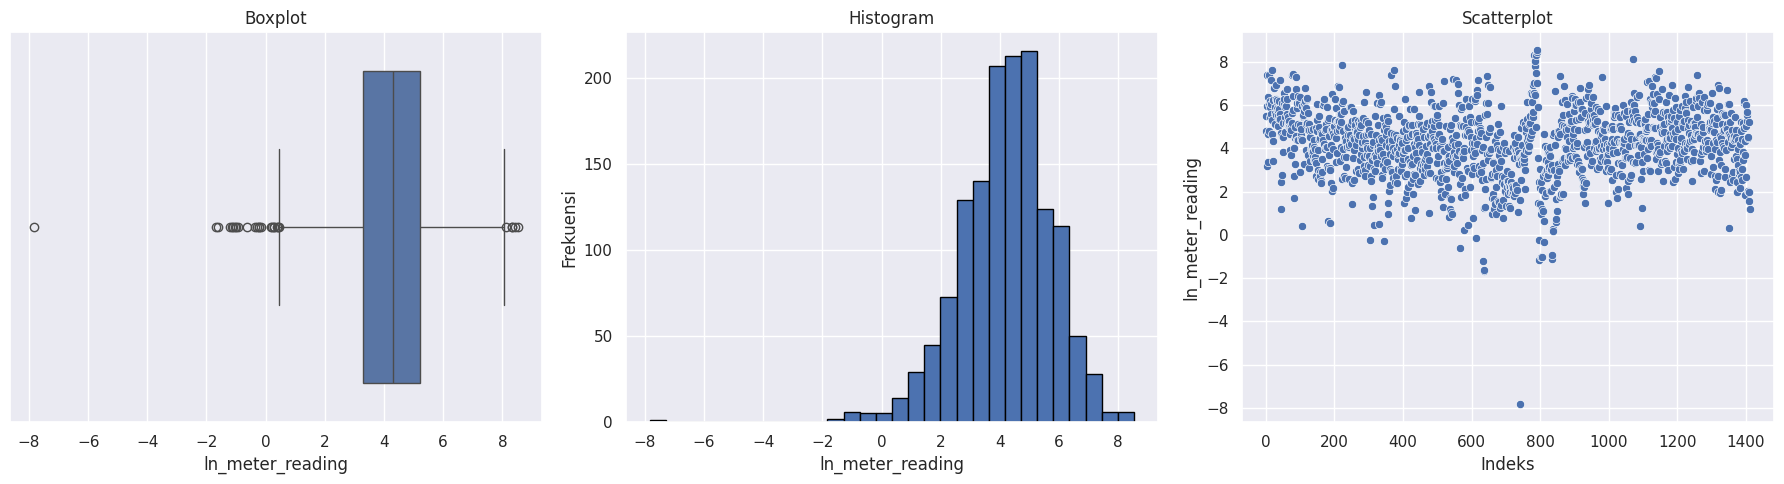

In [ ]:
df1['ln_meter_reading'] = np.log(df1['meter_reading'])
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='ln_meter_reading', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['ln_meter_reading'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('ln_meter_reading')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['ln_meter_reading'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('ln_meter_reading')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df1['ln_meter_reading'].quantile(0.25)
Q3 = df1['ln_meter_reading'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = df1[(df1['ln_meter_reading'] < lower_bound) | (df1['ln_meter_reading'] > upper_bound)]

df1 = df1[(df1['ln_meter_reading'] >= lower_bound) & (df1['ln_meter_reading'] <= upper_bound)]
df1

,meter_reading,primary_use,square_feet,ln_meter_reading
0,237.749127,Education,7432.0,5.471216
1,118.553743,Education,2720.0,4.775366
2,23.626500,Education,5376.0,3.162369
3,382.736016,Education,23685.0,5.947345
4,1579.174237,Education,116607.0,7.364657
...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619.0,2.012786
1409,4.732815,Education,4298.0,1.554520
1410,7.211347,Entertainment/public assembly,11265.0,1.975656
1411,187.117994,Lodging/residential,29775.0,5.231739


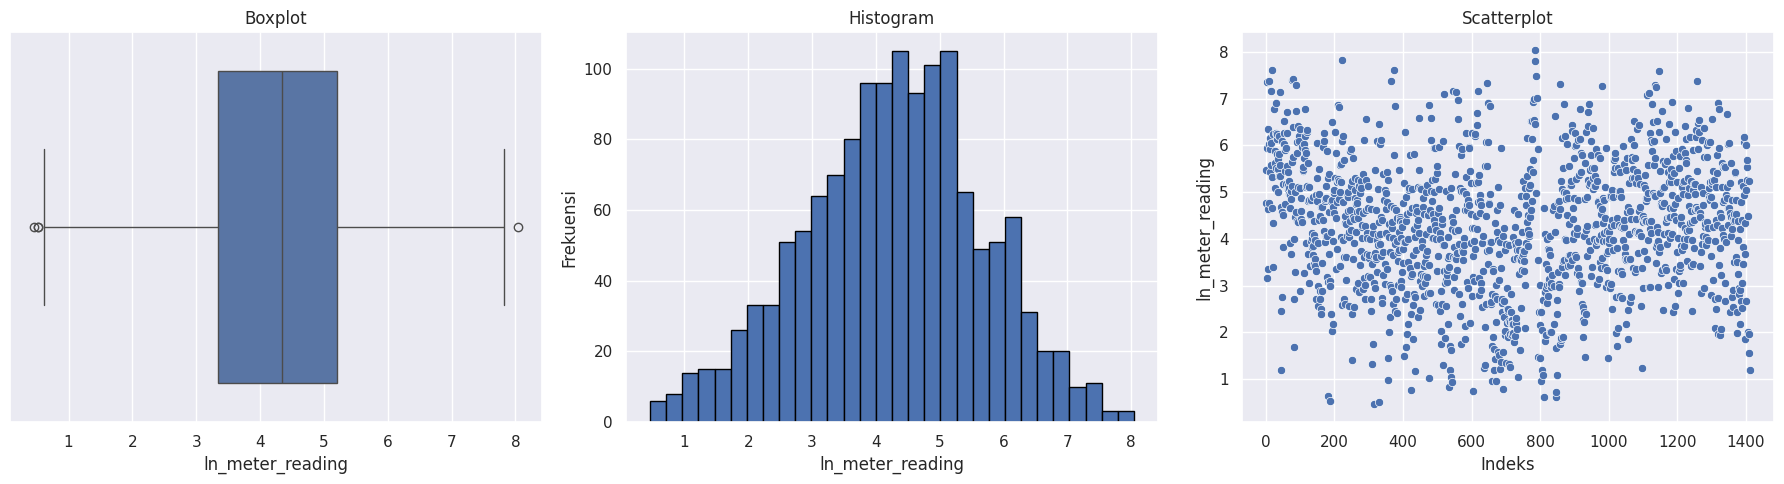

In [ ]:
df1['ln_meter_reading'] = np.log(df1['meter_reading'])
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='ln_meter_reading', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['ln_meter_reading'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('ln_meter_reading')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['ln_meter_reading'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('ln_meter_reading')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Analisis Kolom sqaure_feet (prediktor kontinu)

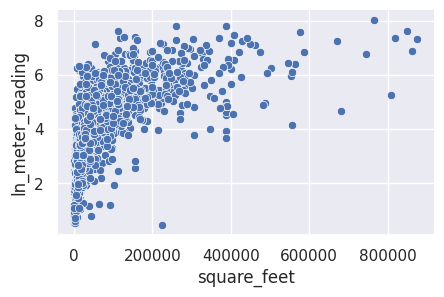

In [ ]:
p = sns.pairplot(df1, x_vars='square_feet', y_vars='ln_meter_reading', height=3, aspect=1.5)

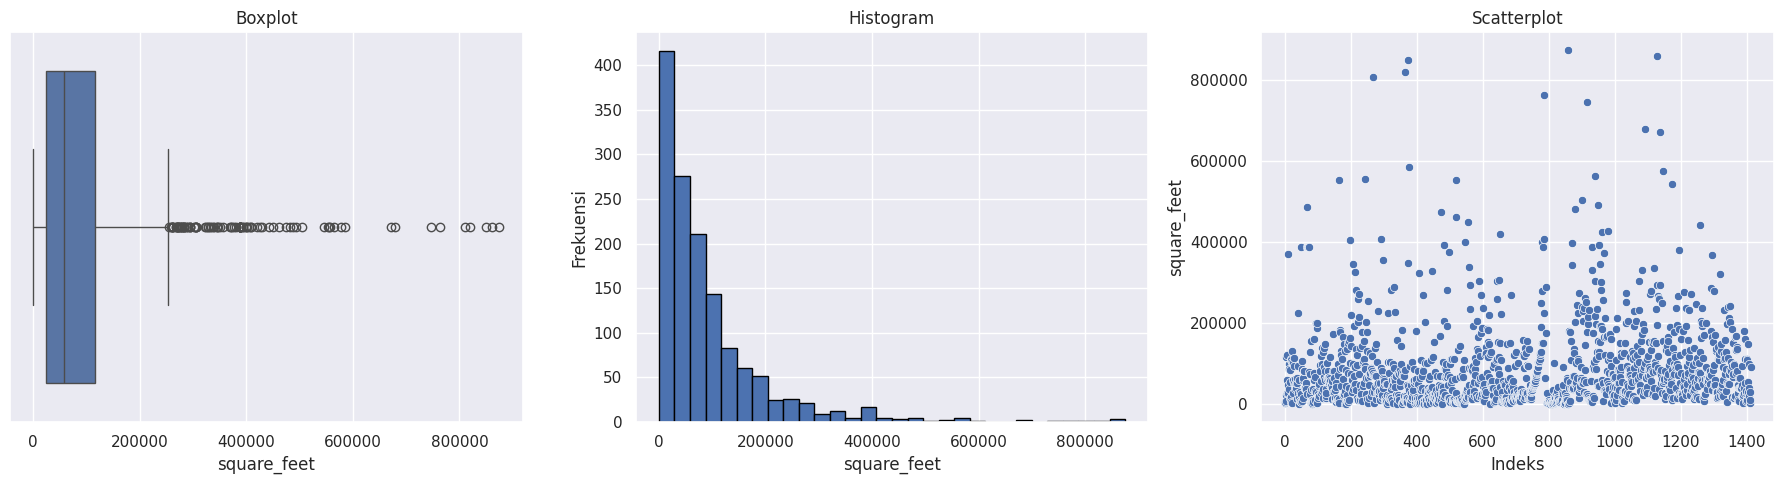

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='square_feet', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['square_feet'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('square_feet')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['square_feet'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('square_feet')

# Menampilkan plot
plt.tight_layout()
plt.show()

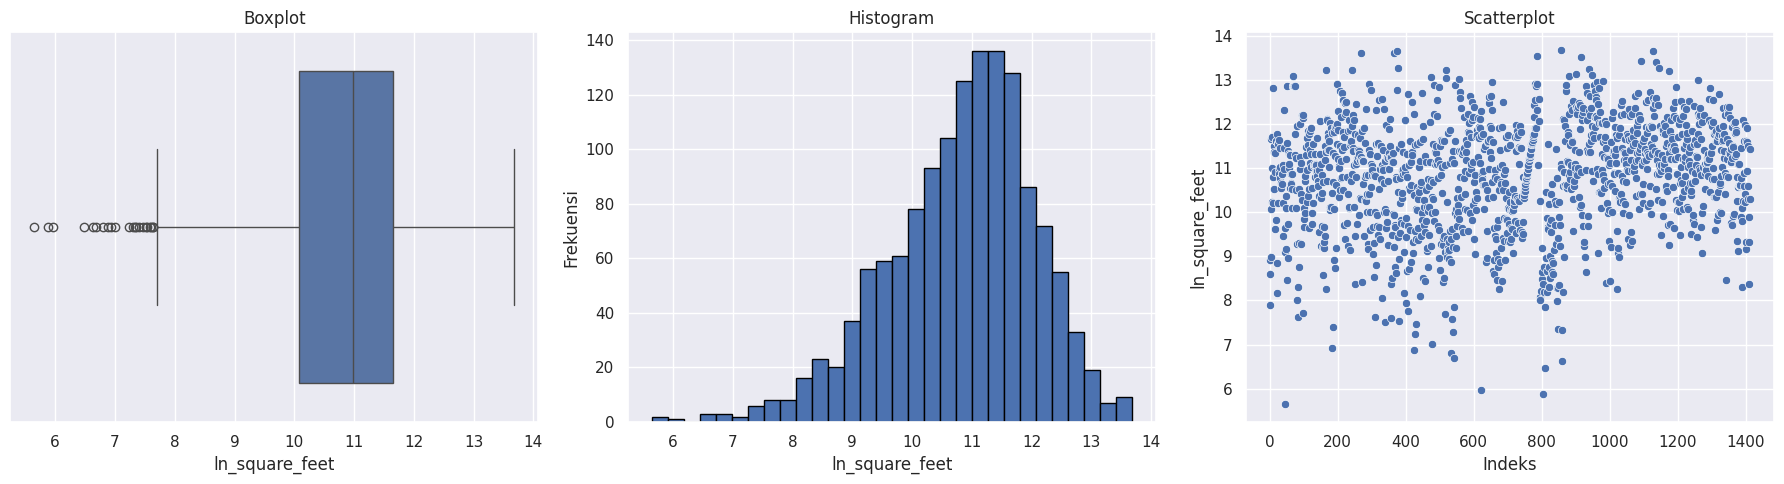

In [ ]:
df1['ln_square_feet'] = np.log(df1['square_feet'])
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='ln_square_feet', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['ln_square_feet'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('ln_square_feet')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['ln_square_feet'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('ln_square_feet')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df1['ln_square_feet'].quantile(0.25)
Q3 = df1['ln_square_feet'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers2 = df1[(df1['ln_square_feet'] < lower_bound) | (df1['ln_square_feet'] > upper_bound)]

df1 = df1[(df1['ln_square_feet'] >= lower_bound) & (df1['ln_square_feet'] <= upper_bound)]
df1

,meter_reading,primary_use,square_feet,ln_meter_reading,ln_square_feet
0,237.749127,Education,7432.0,5.471216,8.913550
1,118.553743,Education,2720.0,4.775366,7.908387
2,23.626500,Education,5376.0,3.162369,8.589700
3,382.736016,Education,23685.0,5.947345,10.072597
4,1579.174237,Education,116607.0,7.364657,11.666565
...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619.0,2.012786,9.884254
1409,4.732815,Education,4298.0,1.554520,8.365905
1410,7.211347,Entertainment/public assembly,11265.0,1.975656,9.329456
1411,187.117994,Lodging/residential,29775.0,5.231739,10.301424


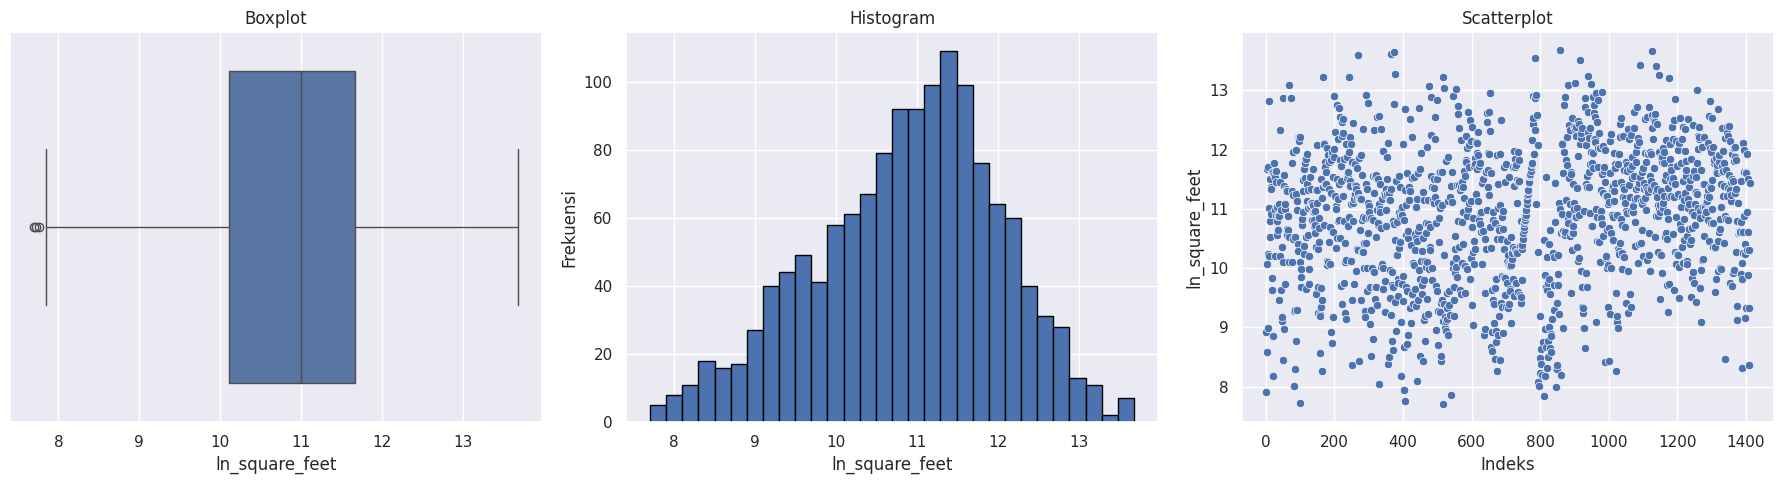

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='ln_square_feet', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['ln_square_feet'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('ln_square_feet')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['ln_square_feet'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('ln_square_feet')

# Menampilkan plot
plt.tight_layout()
plt.show()

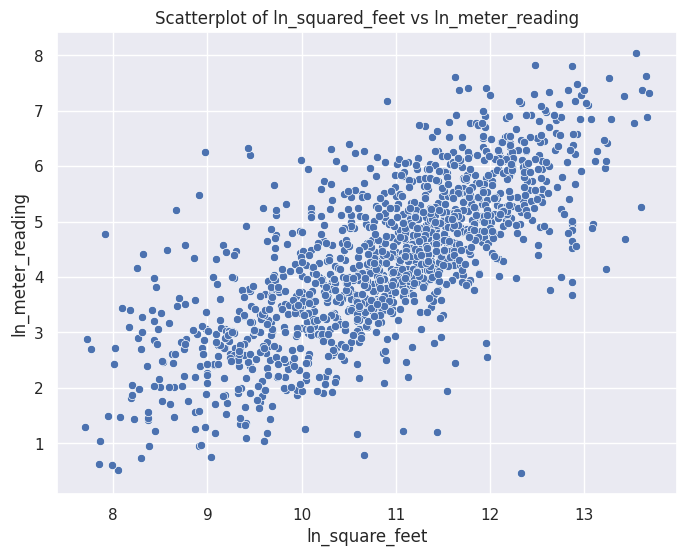

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='ln_square_feet', y='ln_meter_reading')
plt.title('Scatterplot of ln_squared_feet vs ln_meter_reading')
plt.show()

In [ ]:
# Menggunakan fitur ln_target dan ln_squared_feet
asum = df1[['ln_meter_reading', 'ln_square_feet']]

# Membuat model DBSCAN
db = DBSCAN(eps=0.235, min_samples=6)  # eps adalah jarak maksimum antara dua titik untuk dianggap dalam satu cluster
outliers3 = db.fit_predict(asum)

# Menambahkan hasil prediksi outlier
df1['outlier'] = outliers3
a = df1.copy()

# Menghapus data yang terdeteksi sebagai outlier
df1 = df1[df1['outlier'] == 0].drop(columns=['outlier'])

# Menampilkan data yang sudah dibersihkan dari outlier
df1

,meter_reading,primary_use,square_feet,ln_meter_reading,ln_square_feet
5,28.963481,Education,8000.0,3.366036,8.987197
6,104.080095,Lodging/residential,27926.0,4.645161,10.237313
7,569.244417,Education,121074.0,6.344310,11.704157
8,417.394827,Education,60809.0,6.034033,11.015493
9,118.129516,Office,27000.0,4.771782,10.203592
...,...,...,...,...,...
1406,88.691376,Public services,99541.0,4.485163,11.508325
1407,89.441291,Education,40311.0,4.493582,10.604380
1408,7.484137,Entertainment/public assembly,19619.0,2.012786,9.884254
1410,7.211347,Entertainment/public assembly,11265.0,1.975656,9.329456


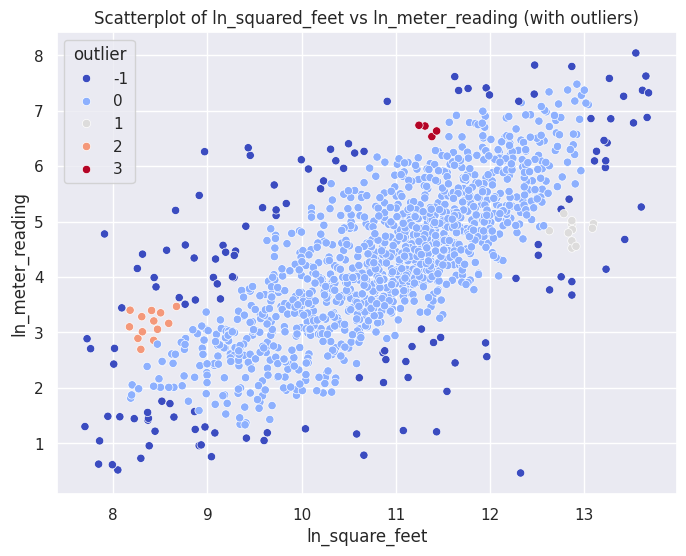

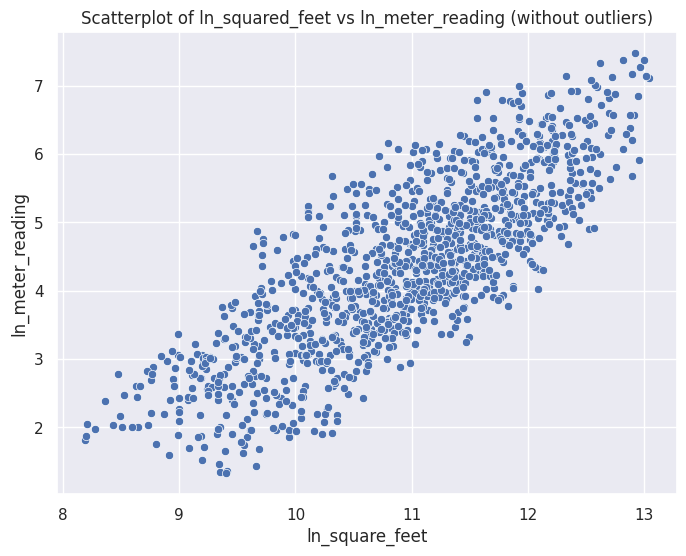

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=a, x='ln_square_feet', y='ln_meter_reading', hue='outlier', palette='coolwarm')
plt.title('Scatterplot of ln_squared_feet vs ln_meter_reading (with outliers)')
plt.show()

# Visualisasi setelah penghapusan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='ln_square_feet', y='ln_meter_reading')
plt.title('Scatterplot of ln_squared_feet vs ln_meter_reading (without outliers)')
plt.show()

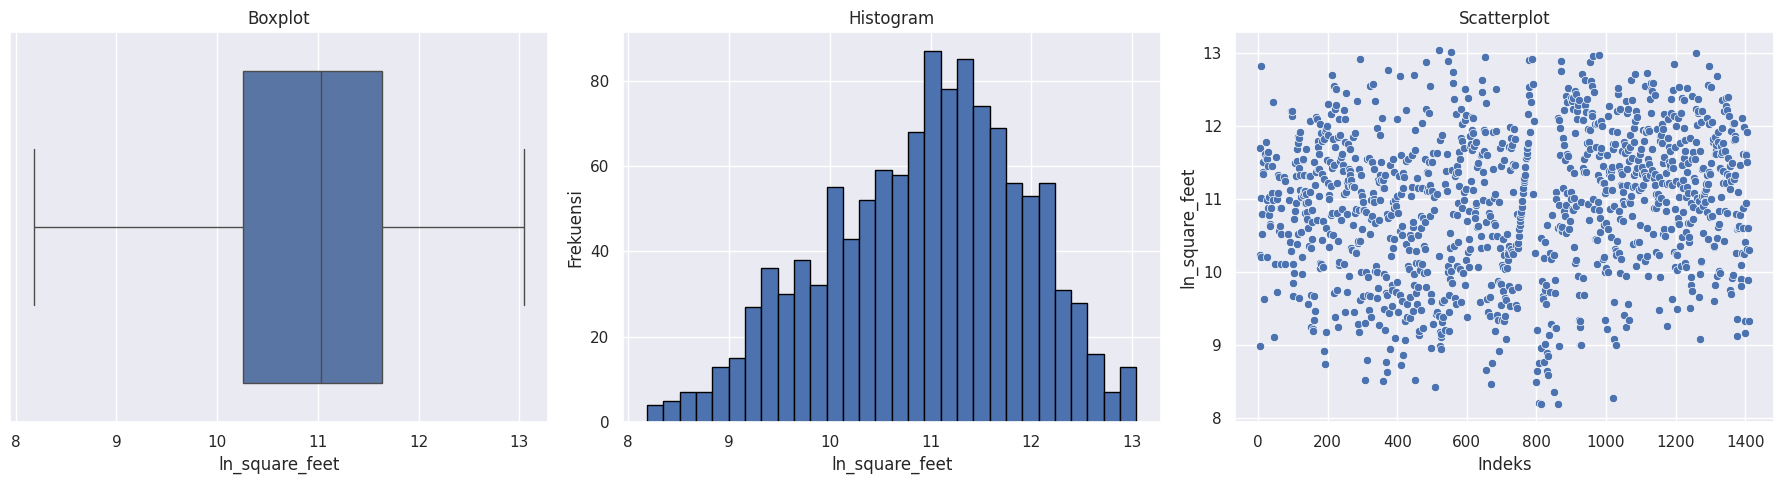

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 baris, 3 kolom

# Plot 1: Boxplot
sns.boxplot(data=df1, x='ln_square_feet', ax=axes[0])
axes[0].set_title('Boxplot')

# Plot 2: Histogram
df1['ln_square_feet'].hist(bins=30, edgecolor='black', ax=axes[1])
axes[1].set_title('Histogram')
axes[1].set_xlabel('ln_square_feet')
axes[1].set_ylabel('Frekuensi')

# Plot 3: Scatterplot
sns.scatterplot(x=df1.index, y=df1['ln_square_feet'], ax=axes[2])
axes[2].set_title('Scatterplot')
axes[2].set_xlabel('Indeks')
axes[2].set_ylabel('ln_square_feet')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Ananlisis Kolom Primary_use (Prediktor Kategorik)

In [ ]:
df1['primary_use'].value_counts()

,count
primary_use,
Education,484
Office,240
Public services,138
Lodging/residential,133
Entertainment/public assembly,128
Healthcare,19
Other,10
Warehouse/storage,10
Manufacturing/industrial,9


In [ ]:
# Buat mapping untuk kategori baru
category_mapping = {
    'Education': 'Education',
    'Technology/science': 'Education',
    'Lodging/residential': 'Residential',
    'Office': 'Office',
    'Entertainment/public assembly': 'Public assembly',
    'Public services': 'Public services',
    'Services': 'Public services',
    'Food sales and service': 'Public services',
    'Healthcare': 'Public services',
    'Retail': 'Others',
    'Parking': 'Others',
    'Warehouse/storage': 'Others',
    'Utility': 'Others',
    'Religious worship': 'Others',
    'Manufacturing/industrial': 'Others',
    'Other': 'Others',
}

# Terapkan mapping ke kolom primary_use
df1['primary_use'] = df1['primary_use'].map(category_mapping)


In [ ]:
df1['primary_use'].value_counts()

,count
primary_use,
Education,489
Office,240
Public services,166
Residential,133
Public assembly,128
Others,46


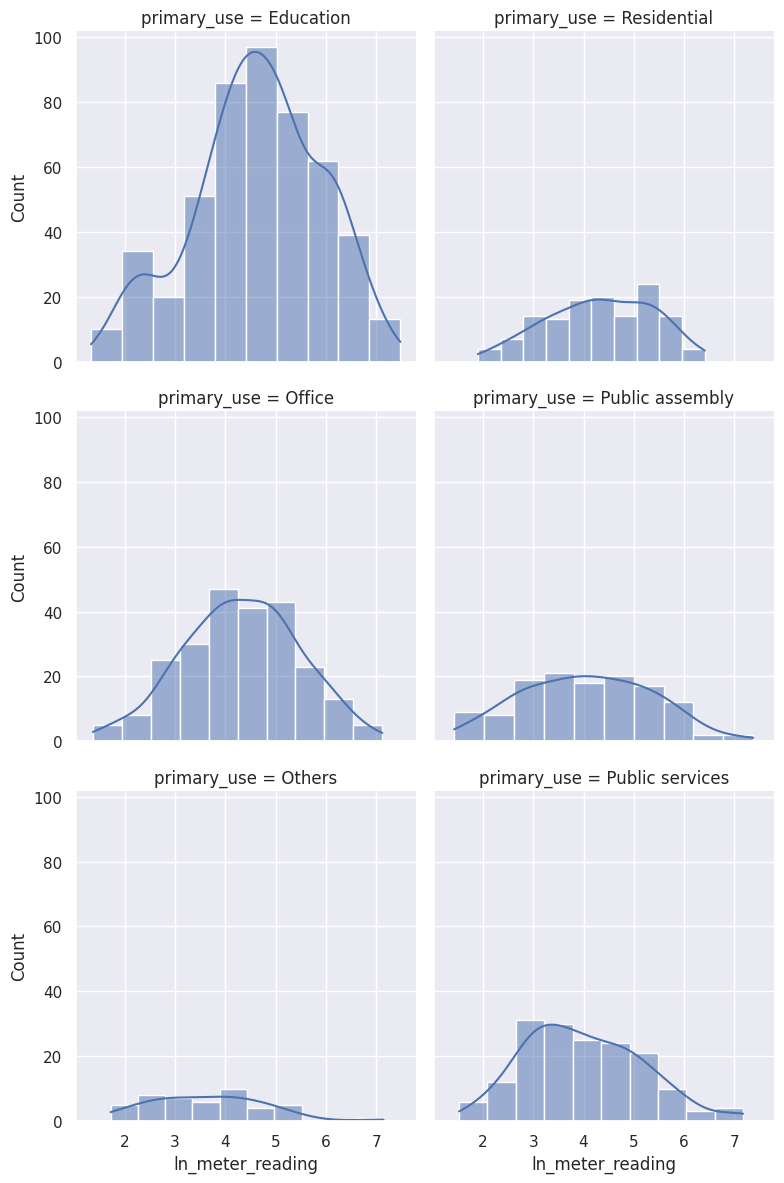

In [ ]:
g = sns.FacetGrid(df1, col="primary_use", col_wrap=2, height=4)
g.map(sns.histplot, "ln_meter_reading", bins=10, kde=True)
plt.show()

### Pembuatan dan Hasil Model

In [ ]:
df1

,meter_reading,primary_use,square_feet,ln_meter_reading,ln_square_feet
5,28.963481,Education,8000.0,3.366036,8.987197
6,104.080095,Residential,27926.0,4.645161,10.237313
7,569.244417,Education,121074.0,6.344310,11.704157
8,417.394827,Education,60809.0,6.034033,11.015493
9,118.129516,Office,27000.0,4.771782,10.203592
...,...,...,...,...,...
1406,88.691376,Public services,99541.0,4.485163,11.508325
1407,89.441291,Education,40311.0,4.493582,10.604380
1408,7.484137,Public assembly,19619.0,2.012786,9.884254
1410,7.211347,Public assembly,11265.0,1.975656,9.329456


In [ ]:
df1 = df1[['ln_meter_reading', 'ln_square_feet', 'primary_use', ]]
df1

,ln_meter_reading,ln_square_feet,primary_use
5,3.366036,8.987197,Education
6,4.645161,10.237313,Residential
7,6.344310,11.704157,Education
8,6.034033,11.015493,Education
9,4.771782,10.203592,Office
...,...,...,...
1406,4.485163,11.508325,Public services
1407,4.493582,10.604380,Education
1408,2.012786,9.884254,Public assembly
1410,1.975656,9.329456,Public assembly


In [ ]:
df1_model = pd.get_dummies(df1, columns=['primary_use'], drop_first=True)
for col in df1_model.columns[2:]:
    df1_model[col] = df1_model[col].astype(int)

# Fitur dan target
X = df1_model[['ln_square_feet'] + [col for col in df1_model.columns if 'primary_use' in col]]
y = df1_model['ln_meter_reading']

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
df1_model

,ln_meter_reading,ln_square_feet,primary_use_Office,primary_use_Others,primary_use_Public assembly,primary_use_Public services,primary_use_Residential
5,3.366036,8.987197,0,0,0,0,0
6,4.645161,10.237313,0,0,0,0,1
7,6.344310,11.704157,0,0,0,0,0
8,6.034033,11.015493,0,0,0,0,0
9,4.771782,10.203592,1,0,0,0,0
...,...,...,...,...,...,...,...
1406,4.485163,11.508325,0,0,0,1,0
1407,4.493582,10.604380,0,0,0,0,0
1408,2.012786,9.884254,0,0,1,0,0
1410,1.975656,9.329456,0,0,1,0,0


In [ ]:
# Menambahkan konstanta untuk regresi
X_train = sm.add_constant(X_train)

# Membuat model regresi linear
model1 = sm.OLS(y_train, X_train).fit()

# Melihat ringkasan model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_meter_reading   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          7.70e-189
Time:                        09:36:21   Log-Likelihood:                -896.82
No. Observations:                 841   AIC:                             1808.
Df Residuals:                     834   BIC:                             1841.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Prediksi menggunakan data test
X_test = sm.add_constant(X_test)
y_test_pred = model1.predict(X_test)

# Menghitung MSE dan R²
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

y_train_pred = model1.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


print(f'R² Train: {r2_train}')
print(f'R² Test: {r2_test}')
print(f'Mean Squared Error Train: {mse_train}')
print(f'Mean Squared Error Test: {mse_test}')

R² Train: 0.6549234183514941
R² Test: 0.6812742975635795
Mean Squared Error Train: 0.4940435925411932
Mean Squared Error Test: 0.5435521028660824


In [ ]:
df_coba = pd.DataFrame({'ln_y_ril':y_test.to_list(), 'ln_y_pred':y_test_pred.to_list()})
df_coba['y_ril'] = np.exp(df_coba['ln_y_ril'])
df_coba['y_pred'] = np.exp(df_coba['ln_y_pred'])
df_coba['selisih'] = df_coba['y_ril'] - df_coba['y_pred']

df_coba

,ln_y_ril,ln_y_pred,y_ril,y_pred,selisih
0,5.237469,5.239056,188.193103,188.492010,-0.298907
1,6.044147,4.749673,421.637884,115.546531,306.091353
2,5.166850,4.950317,175.361496,141.219731,34.141765
3,4.992741,4.160631,147.339707,64.111945,83.227761
4,2.076140,3.602538,7.973632,36.691246,-28.717614
...,...,...,...,...,...
356,4.819575,5.224657,123.912433,185.797512,-61.885080
357,5.150079,4.977796,172.445173,145.154120,27.291053
358,6.338111,5.319527,565.726686,204.287167,361.439518
359,5.555478,3.819849,258.650650,45.597304,213.053345


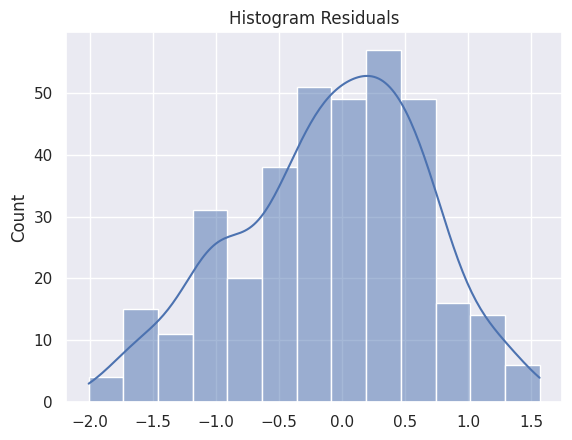

In [ ]:
residu = df_coba['ln_y_pred'] - df_coba['ln_y_ril']
sns.histplot(residu, kde=True)
plt.title("Histogram Residuals")
plt.show()

In [ ]:
from scipy.stats import shapiro, kstest

stat, p_value = shapiro(residu)  # Shapiro-Wilk test
print('Shapiro-Wilk Test p-value:', p_value)

# Interpretasi
if p_value > 0.05:
    print("Residuals are normally distributed")
else:
    print("Residuals are NOT normally distributed")
print("\nkami tidak sempat menangangi evaluasi residual")

Shapiro-Wilk Test p-value: 0.0007205398431576953
Residuals are NOT normally distributed

kami tidak sempat menangangi evaluasi residual


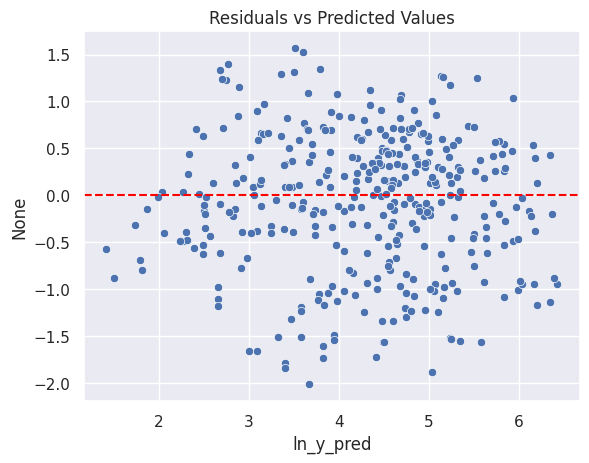

In [ ]:
sns.scatterplot(x=df_coba['ln_y_pred'], y=residu)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()

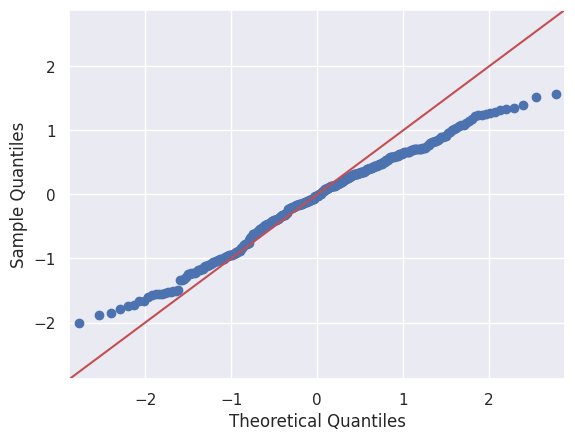

In [ ]:
sm.qqplot(residu, line='45')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Tambahkan intercept
test = het_breuschpagan(model1.resid, X_train)

print("Breusch-Pagan Test p-value:", test[1])  # test[1] = p-value
if test[1] > 0.05:
    print("Homoskedastisitas terpenuhi")
else:
    print("Homoskedastisitas TIDAK terpenuhi")
print("\nkami tidak sempat menangangi evaluasi residual")

Breusch-Pagan Test p-value: 0.0006958883344634754
Homoskedastisitas TIDAK terpenuhi

kami tidak sempat menangangi evaluasi residual


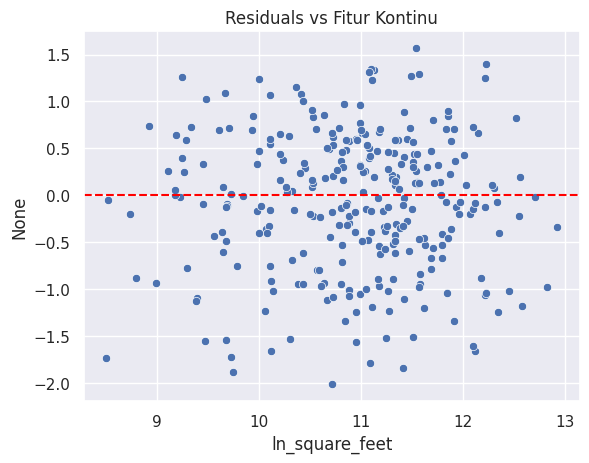

In [ ]:
sns.scatterplot(x=df1_model['ln_square_feet'], y=residu)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitur Kontinu")
plt.show()

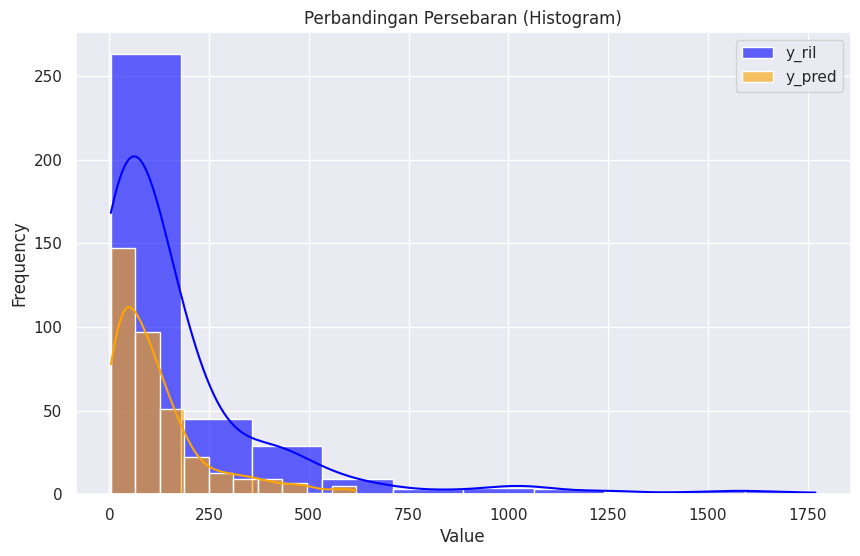

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram untuk Column1
sns.histplot(df_coba['y_ril'], color='blue', label='y_ril', kde=True, bins=10, alpha=0.6)

# Histogram untuk Column2
sns.histplot(df_coba['y_pred'], color='orange', label='y_pred', kde=True, bins=10, alpha=0.6)

plt.legend()
plt.title("Perbandingan Persebaran (Histogram)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


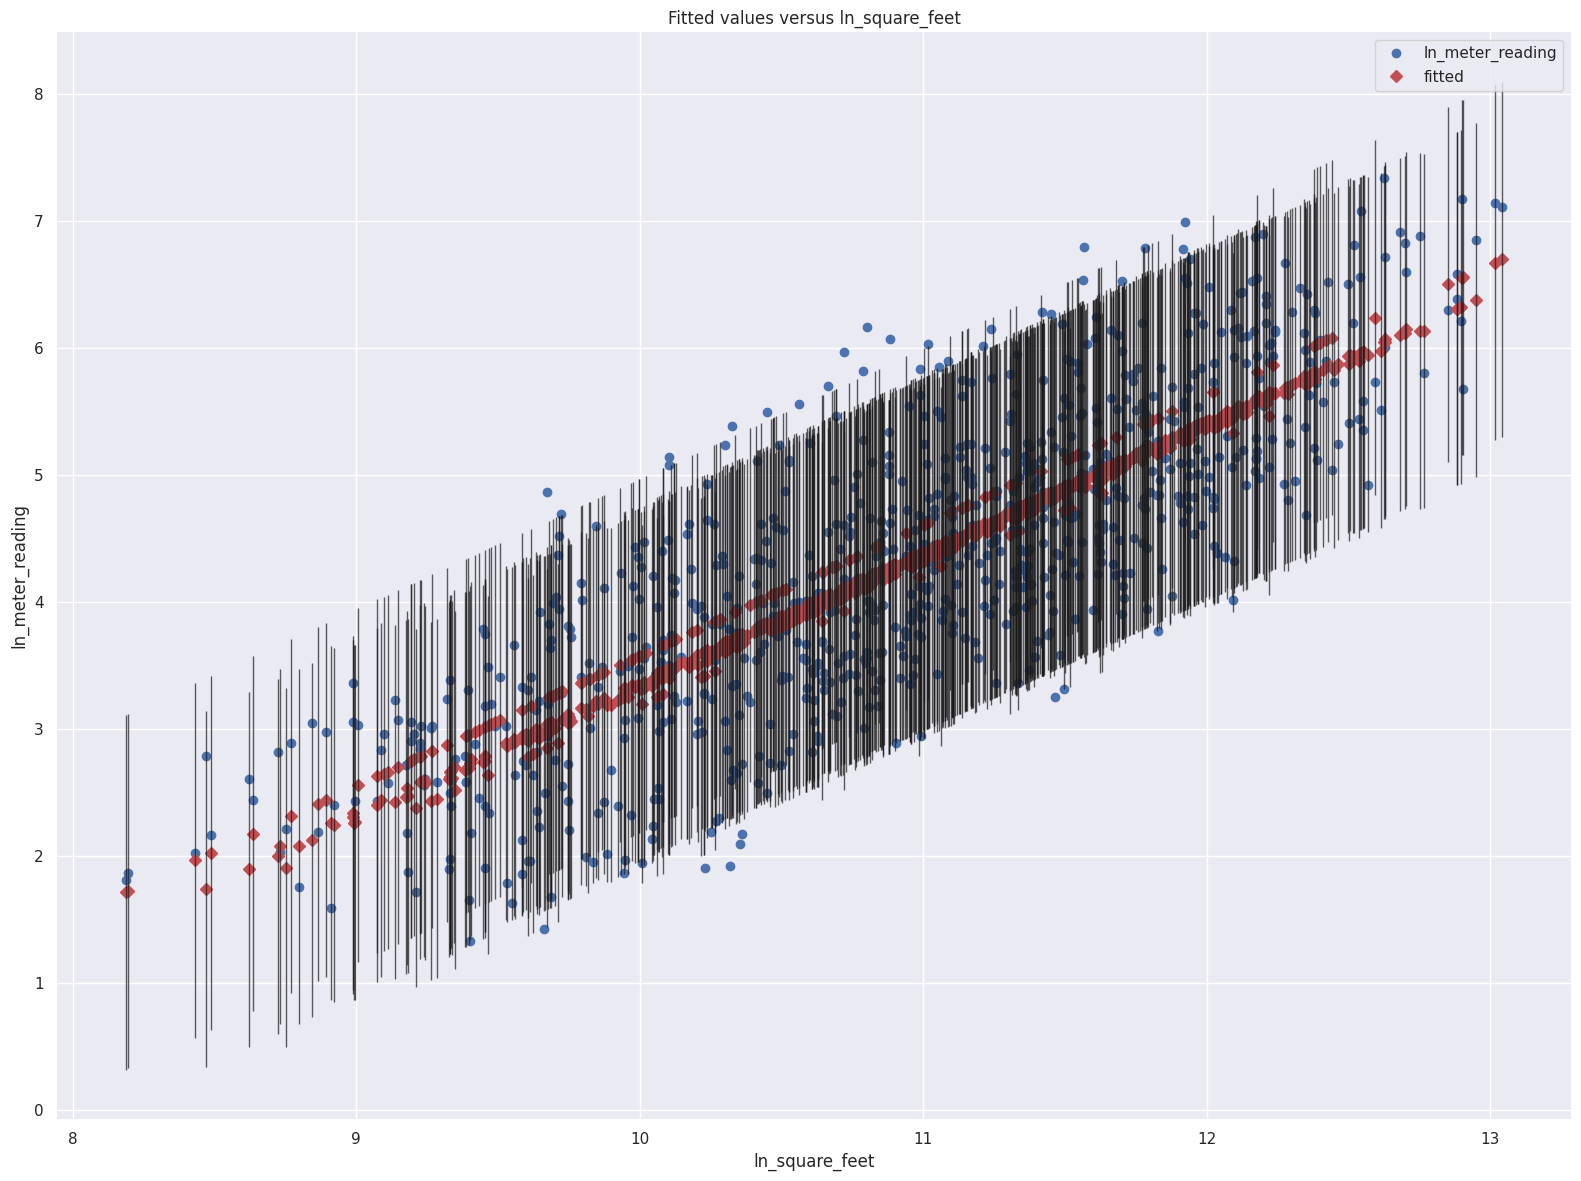

In [ ]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=14)

# Membuat plot fit
fig = sm.graphics.plot_fit(model1, "ln_square_feet")

# Menghilangkan garis hitam (spines)
for spine in fig.axes[0].spines.values():
    spine.set_visible(False)

# Menyesuaikan tata letak plot
fig.tight_layout(pad=1.0)

# Menampilkan plot
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores_val = []
mse_scores_val = []

for train_val_index, test_val_index in kf.split(X):
    X_train_val, X_test_val = X.iloc[train_val_index], X.iloc[test_val_index]
    y_train_val, y_test_val = y.iloc[train_val_index], y.iloc[test_val_index]

    # Tambahkan konstanta ke X_train_val dan X_test_val
    X_train_val = sm.add_constant(X_train_val)
    X_test_val = sm.add_constant(X_test_val)

    # Fit model dengan statsmodels
    model_val = sm.OLS(y_train_val, X_train_val).fit()

    # Prediksi dan hitung R²
    r2_val = model_val.rsquared
    r2_scores_val.append(r2_val)

    y_pred_val = model_val.predict(X_test_val)
    mse_val = mean_squared_error(y_test_val, y_pred_val)
    mse_scores_val.append(mse_val)

print("Cross-validated R²:", np.mean(r2_scores_val))
print("Cross-validated MSE:", np.mean(mse_scores_val))

Cross-validated R²: 0.6648823948739055
Cross-validated MSE: 0.5133877332110316


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model1.params
}).sort_values(by='Coefficient', ascending=False)

feature_importance

,Feature,Coefficient
ln_square_feet,ln_square_feet,1.025833
primary_use_Public services,primary_use_Public services,0.226949
primary_use_Office,primary_use_Office,0.026669
primary_use_Public assembly,primary_use_Public assembly,-0.038639
primary_use_Residential,primary_use_Residential,-0.055241
primary_use_Others,primary_use_Others,-0.161459
const,const,-6.908926


In [ ]:
for i in feature_importance['Feature'].unique()[1:-1]:
    koef = feature_importance[feature_importance['Feature'] == i]['Coefficient'].values[0]
    if koef > 0:
        print(f"Bangunan kategori {i[12:]} memiliki konsumsi energi yang {koef:.2%} lebih tinggi dibandingkan kategori referensi. (hubungan log-level)")
    if koef < 0:
        print(f"Bangunan kategori {i[12:]} memiliki konsumsi energi yang {abs(koef):.2%} lebih rendah dibandingkan kategori referensi. (hubungan log-level)")
print('\nIntersep: -6.908926 Ini adalah nilai dasar (ln_target) untuk konsumsi energi kategori Education, dengan asumsi ln_square_feet adalah 0\n')
print('Setiap peningkatan 1% pada luas bangunan (square_feet), konsumsi energi (meter_reading) meningkat "sekitar" 1%. (hubungan log-log)')

Bangunan kategori Public services memiliki konsumsi energi yang 22.69% lebih tinggi dibandingkan kategori referensi. (hubungan log-level)
Bangunan kategori Office memiliki konsumsi energi yang 2.67% lebih tinggi dibandingkan kategori referensi. (hubungan log-level)
Bangunan kategori Public assembly memiliki konsumsi energi yang 3.86% lebih rendah dibandingkan kategori referensi. (hubungan log-level)
Bangunan kategori Residential memiliki konsumsi energi yang 5.52% lebih rendah dibandingkan kategori referensi. (hubungan log-level)
Bangunan kategori Others memiliki konsumsi energi yang 16.15% lebih rendah dibandingkan kategori referensi. (hubungan log-level)

Intersep: -6.908926 Ini adalah nilai dasar (ln_target) untuk konsumsi energi kategori Education, dengan asumsi ln_square_feet adalah 0

Setiap peningkatan 1% pada luas bangunan (square_feet), konsumsi energi (meter_reading) meningkat "sekitar" 1%. (hubungan log-log)


Kesimpulan

Efisiensi Energi Berdasarkan Luas Bangunan: Hasil ini memberikan wawasan bahwa bangunan dengan luas lebih besar cenderung mengonsumsi lebih banyak energi. Kebijakan efisiensi energi untuk bangunan besar, terutama di kategori Public services, dapat menjadi fokus untuk mengurangi konsumsi energi secara keseluruhan.​

Kategori Bangunan: Bangunan dengan kategori Residential, Public assembly, dan Others memiliki potensi efisiensi yang lebih baik dibandingkan kategori Education atau Public services. Intervensi yang tepat pada kategori dengan konsumsi energi lebih tinggi, seperti Education dan Public services, dapat menghasilkan pengurangan konsumsi energi yang signifikan.

Saran

Optimalisasi Efisiensi Energi di Bangunan Pendidikan (Education): Mengingat kategori ini adalah kategori referensi dengan konsumsi energi yang relatif tinggi, program-program efisiensi energi dapat diterapkan di sektor pendidikan.​


Investigasi Teknologi dan Perilaku di Bangunan Public Services: Konsumsi energi yang lebih tinggi pada bangunan kategori ini menunjukkan perlunya kajian lebih mendalam terkait desain bangunan, pola penggunaan, atau teknologi hemat energi yang dapat diterapkan.